<a href="https://colab.research.google.com/github/thetinybug/MLDL-LearnPyTorch/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**
Triển khai ví dụ về Regression với Pytorch
* **Ví dụ**: Giả sử chúng ta có một công ty ô tô. Nếu giá xe xuống thấp, chúng ta sẽ bán được nhiều xe hơn. Nếu giá xe tăng cao, ta bán được ít xe hơn. Đây là thực tế mà chúng ta biết và chúng ta có dữ liệu về điều này.  
* **Câu hỏi đặt ra là**: Làm sao để ước lượng được số xe ta sẽ bán được khi mà giá xe là 100?

In [0]:
# Import thư viện

import numpy as np
import torch
from torch.autograd import Variable

# **0. Khởi tạo dữ liệu**

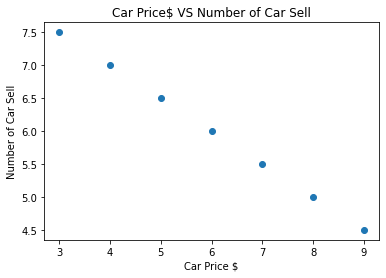

In [2]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

# **1. Triển khai mô hình Lenear Regression**

epoch 0, loss 13.487879753112793
epoch 50, loss 4.2745256423950195
epoch 100, loss 2.8884761333465576
epoch 150, loss 1.951864242553711
epoch 200, loss 1.3189573287963867
epoch 250, loss 0.8912749886512756
epoch 300, loss 0.6022725105285645
epoch 350, loss 0.4069812595844269
epoch 400, loss 0.27501437067985535
epoch 450, loss 0.18583893775939941
epoch 500, loss 0.12557916343212128
epoch 550, loss 0.08485918492078781
epoch 600, loss 0.05734293907880783
epoch 650, loss 0.03874907270073891
epoch 700, loss 0.02618446573615074
epoch 750, loss 0.01769408956170082
epoch 800, loss 0.011956657283008099
epoch 850, loss 0.008079656399786472
epoch 900, loss 0.005459788255393505
epoch 950, loss 0.0036893978249281645
epoch 1000, loss 0.0024929556529968977


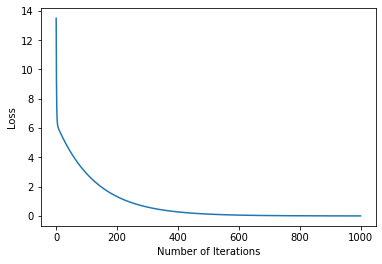

In [3]:
# Linear Regression with Pytorch

# libraries
import torch      
from torch.autograd import Variable     
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everything in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

# **2. Sử dụng Model**

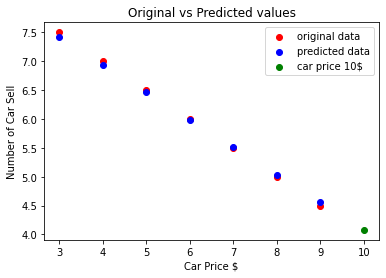

In [4]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
predicted_10 = model(torch.from_numpy(np.array([10.0], dtype=np.float32))).data.numpy()
plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")

plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()